In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Welcome to JupyROOT 6.26/04


In [67]:
base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_bkg/'

base_file_loc = '/media/jykim/T7/storage/01_recon/v2_pre_omega_const_bkg/'
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/massvetov2_pre_sel_study_1ab_bkg/'

# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'

phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [68]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Belle2Pi0Veto_75MeV>0.023 '

# # base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && dM_pi0_75MeV >0.023'
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter='D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && Dstarp_delM>0.140 && Dstarp_delM<0.16'
base_filter=' Dstarp_D0_rest_frame_gamma_p>0.6 && Dstarp_D0_rest_frame_gamma_p<0.7 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && gamma_E>0.48 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && dM_pi0_75MeV>0.023'
base_filter='abs(Phi_M - 1.0195)  < 0.011 && Dstarp_CMS_p>2.5 && gamma_E>0.48 &&  Dstarp_D0_rest_frame_V_p>0.55 && Dstarp_D0_rest_frame_V_p<0.75 && abs(Dstarp_delM-(2.0103-1.8648))<0.0008 && dM_pi0_75MeV>0.023'
# 
variables=['Dstarp_M','__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Phi_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['Pi0_Prob']
variables += ['Dstarp_D0_rest_frame_gamma_p']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#               'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# ccbar_variables = variables + ['iCascDcyBrP_Dst_0']
tree='phi'

In [33]:
# test = '/media/jykim/T7/storage/Ntuples_ghi/D2phipi0/massvetov2_pre_*.root'
# test = get_pd(file=test, tree=tree,base_filter=base_filter,variables=variables)


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "Dstarp_D0_rest_frame_gamma_p" is not in a dataset and is not a custom column been defined.

In [69]:
# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)


# pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=ccbar_variables)
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

(array([ 30.,  27.,  19.,  32.,  28.,  31.,  33.,  39.,  37.,  49.,  55.,
         51.,  60.,  73.,  71.,  90., 104., 120., 140., 169., 168., 194.,
        199., 169., 125.,  85.,  52.,  26.,  12.,   8.,  11.,   7.,   4.,
          7.,   9.,  10.,   7.,  10.,   4.,   6.,   6.,   6.,   5.,   4.,
          9.,   6.,   7.,   5.,   3.,   7.]),
 array([0.55009694, 0.55408641, 0.55807588, 0.56206535, 0.56605482,
        0.57004428, 0.57403375, 0.57802322, 0.58201269, 0.58600215,
        0.58999162, 0.59398109, 0.59797056, 0.60196003, 0.60594949,
        0.60993896, 0.61392843, 0.6179179 , 0.62190736, 0.62589683,
        0.6298863 , 0.63387577, 0.63786523, 0.6418547 , 0.64584417,
        0.64983364, 0.65382311, 0.65781257, 0.66180204, 0.66579151,
        0.66978098, 0.67377044, 0.67775991, 0.68174938, 0.68573885,
        0.68972831, 0.69371778, 0.69770725, 0.70169672, 0.70568619,
        0.70967565, 0.71366512, 0.71765459, 0.72164406, 0.72563352,
        0.72962299, 0.73361246, 0.73760193, 0.

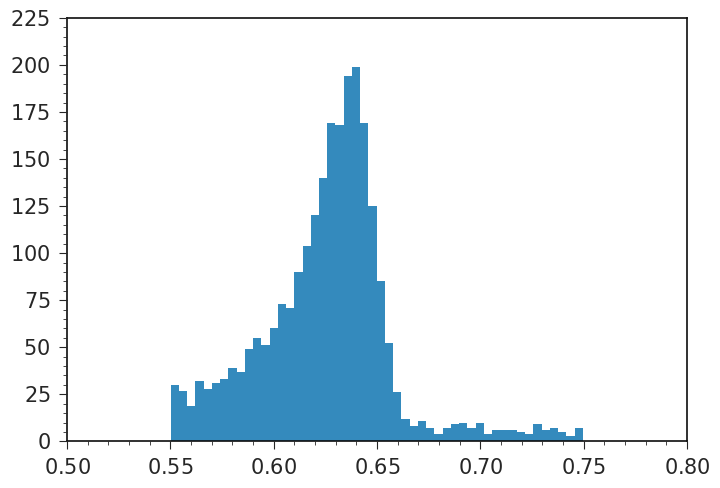

In [71]:
plt.hist(pd_phigamma_ccbar.Dstarp_D0_rest_frame_gamma_p, bins=50)

(array([ 12.,  19.,  25.,  27.,  28.,  34.,  32.,  29.,  41.,  54.,  40.,
         62.,  49.,  72.,  72.,  84., 101., 121., 138., 155., 173., 211.,
        191., 205., 123.,  96.,  56.,  25.,  11.,  13.,   8.,   5.,   6.,
          7.,   9.,   5.,  14.,   8.,   3.,   6.,   7.,   5.,   9.,   3.,
          5.,   5.,   7.,   6.,   5.,   7.]),
 array([1.84728094, 1.85352925, 1.85977755, 1.86602585, 1.87227415,
        1.87852245, 1.88477075, 1.89101905, 1.89726736, 1.90351566,
        1.90976396, 1.91601226, 1.92226056, 1.92850886, 1.93475716,
        1.94100547, 1.94725377, 1.95350207, 1.95975037, 1.96599867,
        1.97224697, 1.97849527, 1.98474357, 1.99099188, 1.99724018,
        2.00348848, 2.00973678, 2.01598508, 2.02223338, 2.02848168,
        2.03472999, 2.04097829, 2.04722659, 2.05347489, 2.05972319,
        2.06597149, 2.07221979, 2.0784681 , 2.0847164 , 2.0909647 ,
        2.097213  , 2.1034613 , 2.1097096 , 2.1159579 , 2.12220621,
        2.12845451, 2.13470281, 2.14095111, 2.

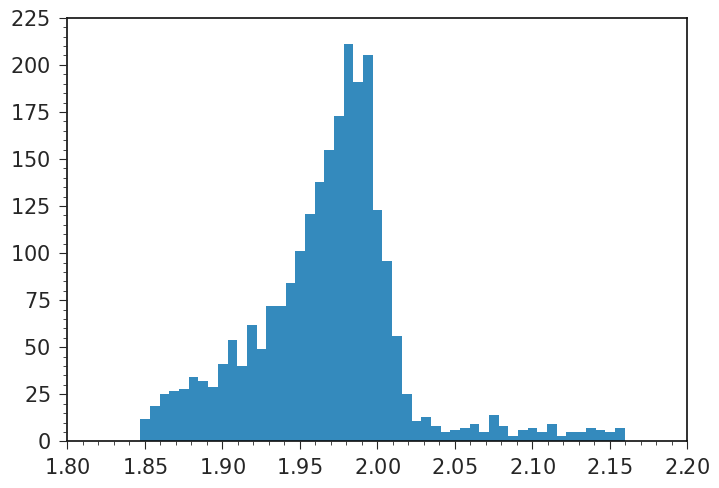

In [70]:
plt.hist(pd_phigamma_ccbar.Dstarp_M, bins=50)

In [31]:
pd_phigamma_ccbar['Dstarp_D0_rest_frame_gamma_p'].corr(pd_phigamma_ccbar['D0_M'])

0.9990004400999425

In [72]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [73]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [74]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

2540
2546
0.997643362136685


In [93]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [75]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'Pi0_Prob<0.9 & abs(Dstarp_delM-(2.0103-1.8648))<0.002'
cut = ' abs(Dstarp_delM-(2.0103-1.8648))<0.002'

# cut = 'rank==1'

cut = 'gamma_E>0'
# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[  0.   0.   1.  16.  24.  33.  39.  42.  40.  43.  59.  56.  71.  60.
 101.  91. 110. 143. 161. 204. 211. 241. 239. 167. 114.  62.  24.  10.
  17.   8.   8.  17.   9.  16.  12.  10.  10.  14.   8.   7.  10.   6.
  11.   9.  10.   2.   0.   0.   0.   0.]
fitst_bin_entries=0.0


TypeError: matplotlib.axes._base._AxesBase.set_xlim() argument after * must be an iterable, not type

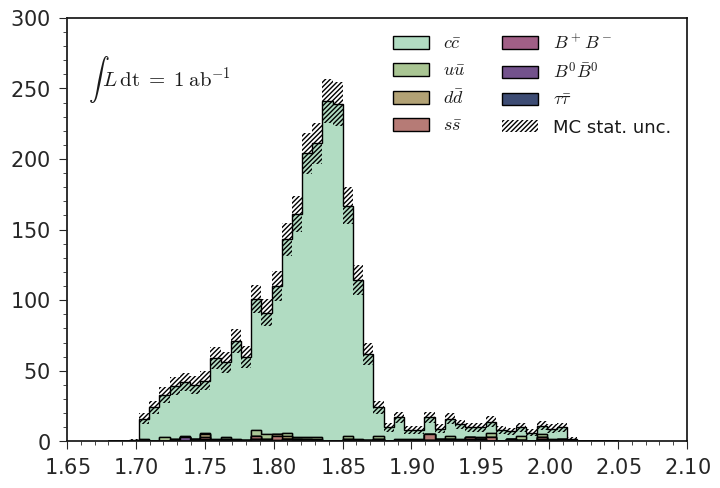

In [93]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.71,2.01)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[123. 130. 104. 100.  99.  82.  79.  60.  63.  61.  54.  56.  44.  29.
  27.  28.  20.  17.  12.  17.  14.  18.  15.  12.   5.  10.  14.  17.
  12.  16.  15.  19.  26.  21.  23.  19.  32.  49.  47.  59.  49.  72.
  74.  81.  87.  85.  98. 114. 132. 106.]
fitst_bin_entries=123.0


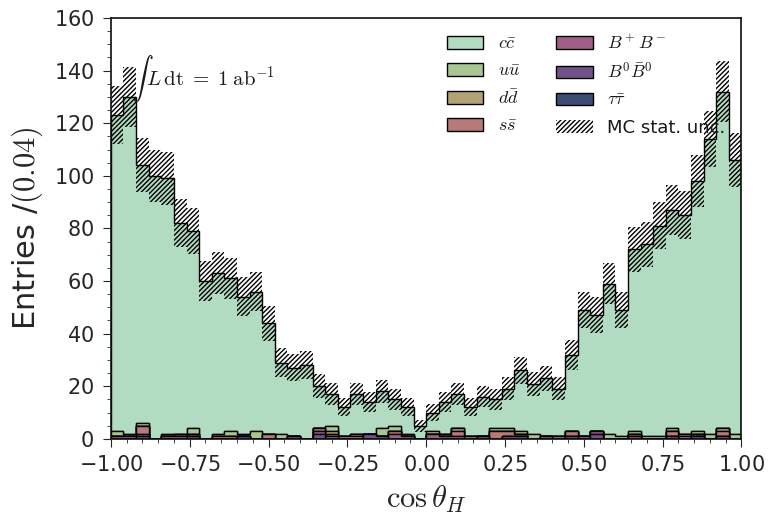

In [77]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_coshel.png")

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 116. 625. 840.
 617. 348.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
fitst_bin_entries=0.0


TypeError: matplotlib.axes._base._AxesBase.set_xlim() argument after * must be an iterable, not type

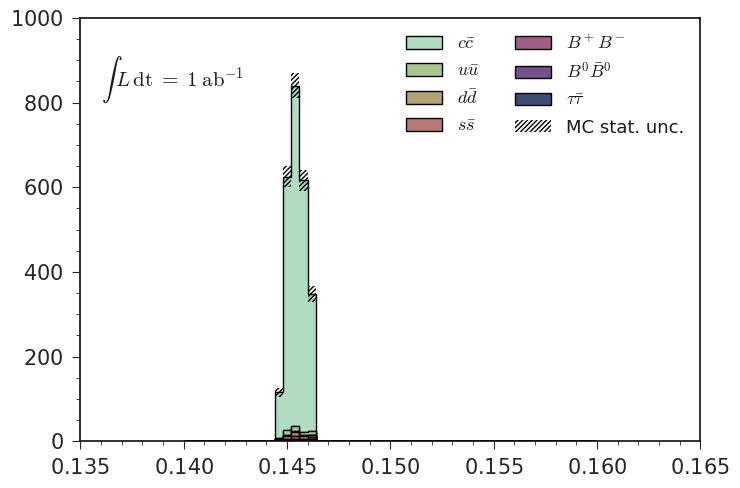

In [78]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (0.14,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[ 21.  28.  30.  33.  30.  32.  40.  40.  49.  48.  56.  45.  78.  74.
  78.  96. 113. 134. 133. 169. 170. 196. 187. 160. 109.  83.  51.  25.
  12.  12.  10.   7.   7.   8.  12.   7.  11.  14.   9.   5.   6.  11.
   9.   7.   7.   6.   7.   7.   8.   7.]
fitst_bin_entries=21.0


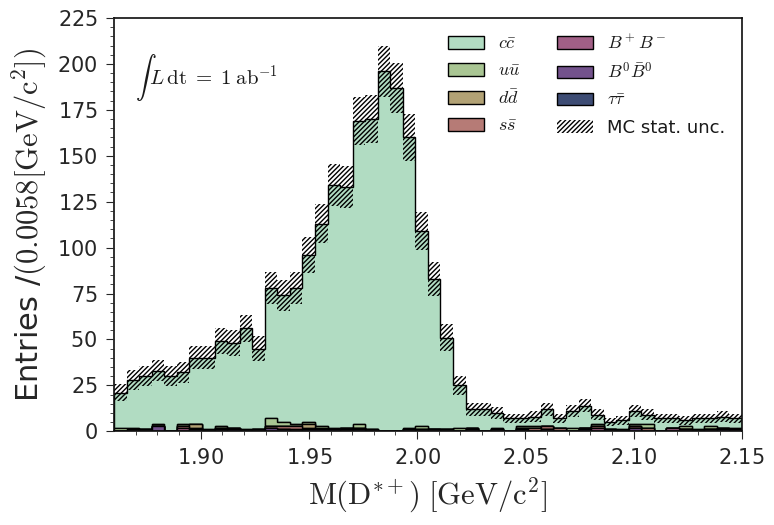

In [90]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
# xrange = (0.14,0.16)
xrange = (1.86,2.15)

nbins = 50
xlabel = "$\mathrm{M(D^{*+})}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("MC15ri_kshortg_1ab_onlyD0.png")

[2.269e+03 2.340e+02 3.800e+01 4.000e+00 1.000e+00]
fitst_bin_entries=2269.0


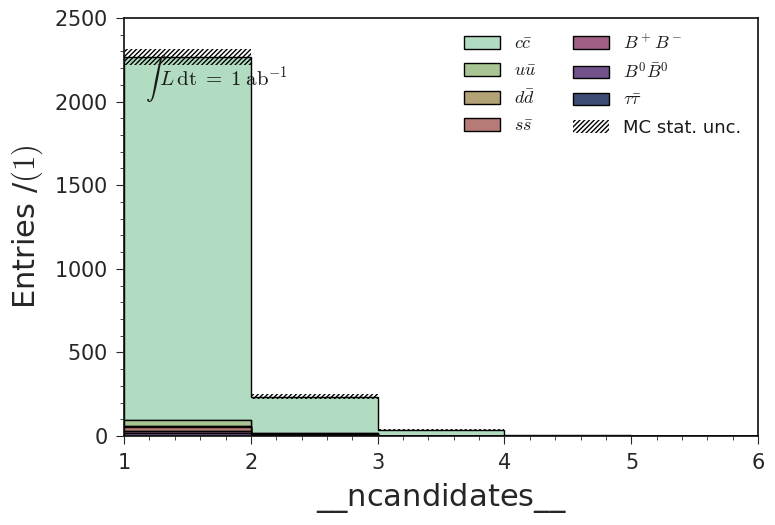

In [86]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity='$1\\; \\mathrm{ab}^{-1}$')
# plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_ncandidates.png")

[122. 133. 105. 102. 101.  75.  73.  60.  54.  62.  52.  57.  41.  28.
  24.  27.  23.  15.  10.  17.  12.  19.  14.   9.   9.   8.  13.  16.
  12.  16.  15.  16.  21.  19.  21.  23.  29.  48.  48.  54.  55.  71.
  69.  78.  82.  83.  98. 107. 126. 102.]
fitst_bin_entries=122.0


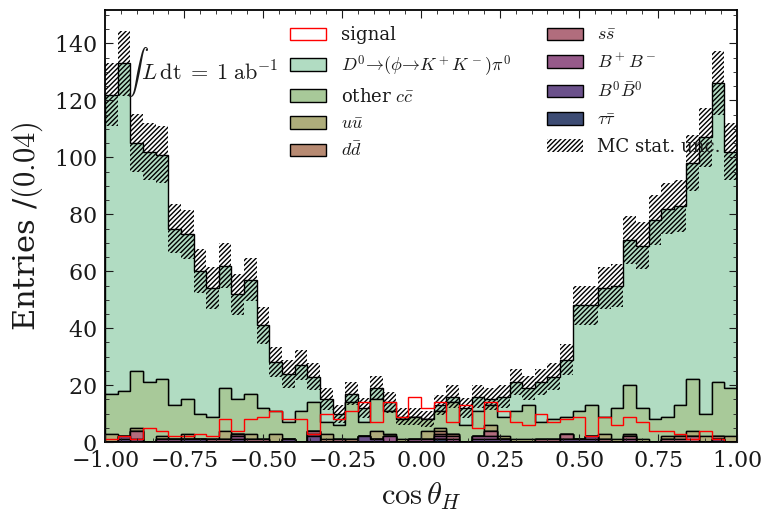

In [36]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$',  r'$D^0 \to (\phi \to K^+ K^-) \pi^0 $']

# data  = taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'

pd_ccbar_signal = pd_ccbar.query("iCascDcyBrP_Dst_0==3 ")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0 ")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=3")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var],  pd_ccbar_pi0[var]]  

# pd_ccbar_signal[var]

scale = 1
xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
plt.hist(pd_ccbar_signal[var],bins=np.linspace(-1,1,51),histtype='step',color='red',label='signal')
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=2)

# plt.legend()
plt.savefig("/media/jykim/T7/saved_plots/DRAW/phigamma/MC15ri/MC15ri_phig_1ab_topo_coshel.png")


[ 38.  36.  46.  39.  21.  22.  28.  37.  31.  34.  53.  44.  67.  48.
  93.  82. 102. 125. 147. 194. 199. 228. 235. 159. 105.  52.  22.   7.
  13.   4.   7.  13.   8.  11.   9.   6.   8.   8.   8.   6.  10.   5.
   8.   9.   8.   4.   8.  10.   7.  10.]
fitst_bin_entries=38.0


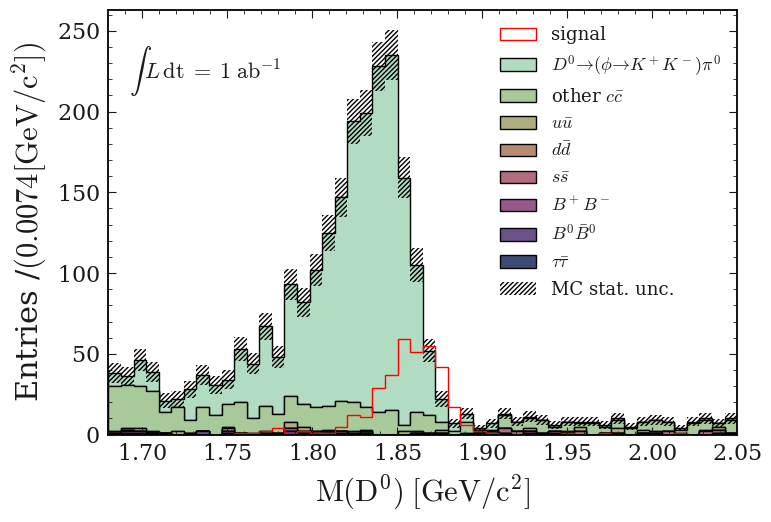

In [35]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$',r'other $c\bar{c}$',  r'$D^0 \to (\phi \to K^+ K^-) \pi^0 $']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'

pd_ccbar_signal = pd_ccbar.query("iCascDcyBrP_Dst_0==3 ")
pd_ccbar_pi0 = pd_ccbar.query("iCascDcyBrP_Dst_0==0 ")
pd_ccbar_others = pd_ccbar.query("iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=3")
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var],pd_ccbar_others[var],  pd_ccbar_pi0[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"
plt.hist(pd_ccbar_signal[var],bins=np.linspace(1.68,2.05,51),histtype='step',color='red',label='signal')
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1)
plt.savefig("/media/jykim/T7/saved_plots/DRAW/phigamma/MC15ri/MC15ri_phig_1ab_topo.png")

In [49]:
len(pd_ccbar_others)

7810

In [50]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(20)

 9     2242
-1     1176
 3      947
 7      404
 34     264
 5      230
 11     179
 32      79
 14      78
 13      65
 69      56
 21      54
 25      53
 62      53
 26      50
 4       50
 43      48
 2       44
 50      44
 15      43
Name: iCascDcyBrP_Dst_0, dtype: int64

In [51]:
pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts().nlargest(10).index[0]

9

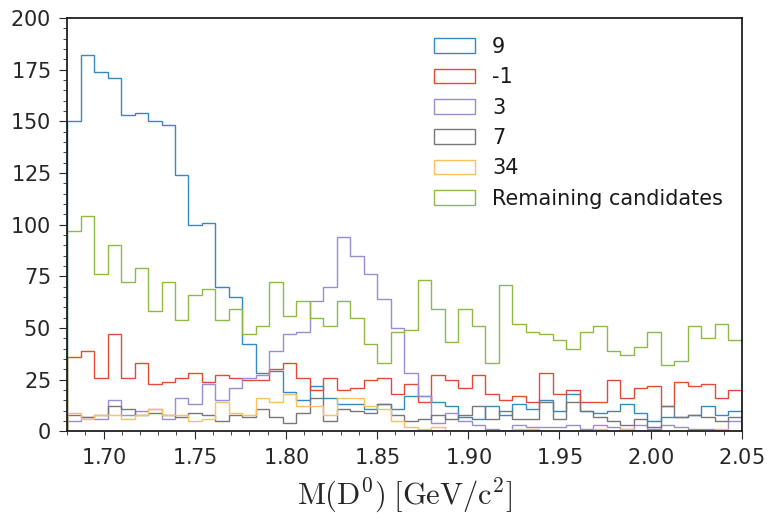

7810


In [58]:


# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

N_total = 0
for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    
    N_total += len(df)
    plt.hist(df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label=decay_chain)
    
    
    
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    
    N_total += len(remaining_df)
    plt.hist(remaining_df.D0_M, bins=np.linspace(1.68, 2.05, 51), histtype='step', label='Remaining candidates')

plt.xlim(1.68, 2.05)
# plt.tight_layout()
plt.legend()
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta.png")

plt.show()


print(N_total)

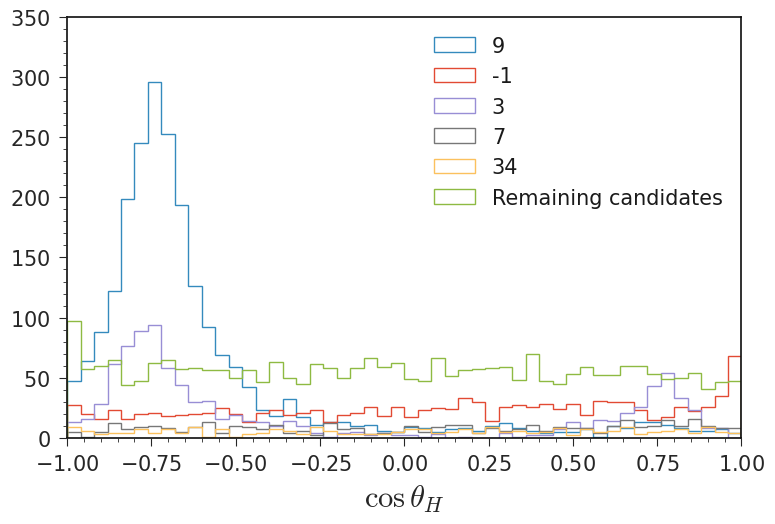

In [59]:

# Assuming you have defined pd_ccbar_others DataFrame and other required variables

bkg_listing = pd_ccbar_others['iCascDcyBrP_Dst_0'].value_counts()

plotted_indices = set()  # To store indices that have been plotted

for i in range(5):  # Loop from 0 to 5
    decay_chain = bkg_listing.index[i]
    df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'] == decay_chain]
    plt.hist(df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label=decay_chain)
    plotted_indices.add(decay_chain)

remaining_candidates = [decay_chain for decay_chain in bkg_listing.index if decay_chain not in plotted_indices]

if remaining_candidates:
    remaining_df = pd_ccbar_others[pd_ccbar_others['iCascDcyBrP_Dst_0'].isin(remaining_candidates)]
    plt.hist(remaining_df.D0_cosHel_0, bins=np.linspace(-1,1, 51), histtype='step', label='Remaining candidates')

plt.xlim(-1,1)
plt.legend()
plt.xlabel(r"$\cos\theta_H$")
plt.tight_layout()

plt.savefig("/media/jykim/T7/saved_plots/DRAW/CALIB/MC15ri/MC15ri_kshortg_1ab_onlyD0_topo_excpet_pi0eta_coshel.png")

plt.show()




